# Information Increase



Anger
{'RAVDESS': 'anger_ravdess_infogain.pkl'}
Fear
{'RAVDESS': 'fear_ravdess_infogain.pkl'}
Joy
{'RAVDESS': 'joy_ravdess_infogain.pkl'}
Sadness
{'RAVDESS': 'sadness_ravdess_infogain.pkl'}
Disgust
{'RAVDESS': 'disgust_ravdess_infogain.pkl'}


<Figure size 2500x600 with 0 Axes>

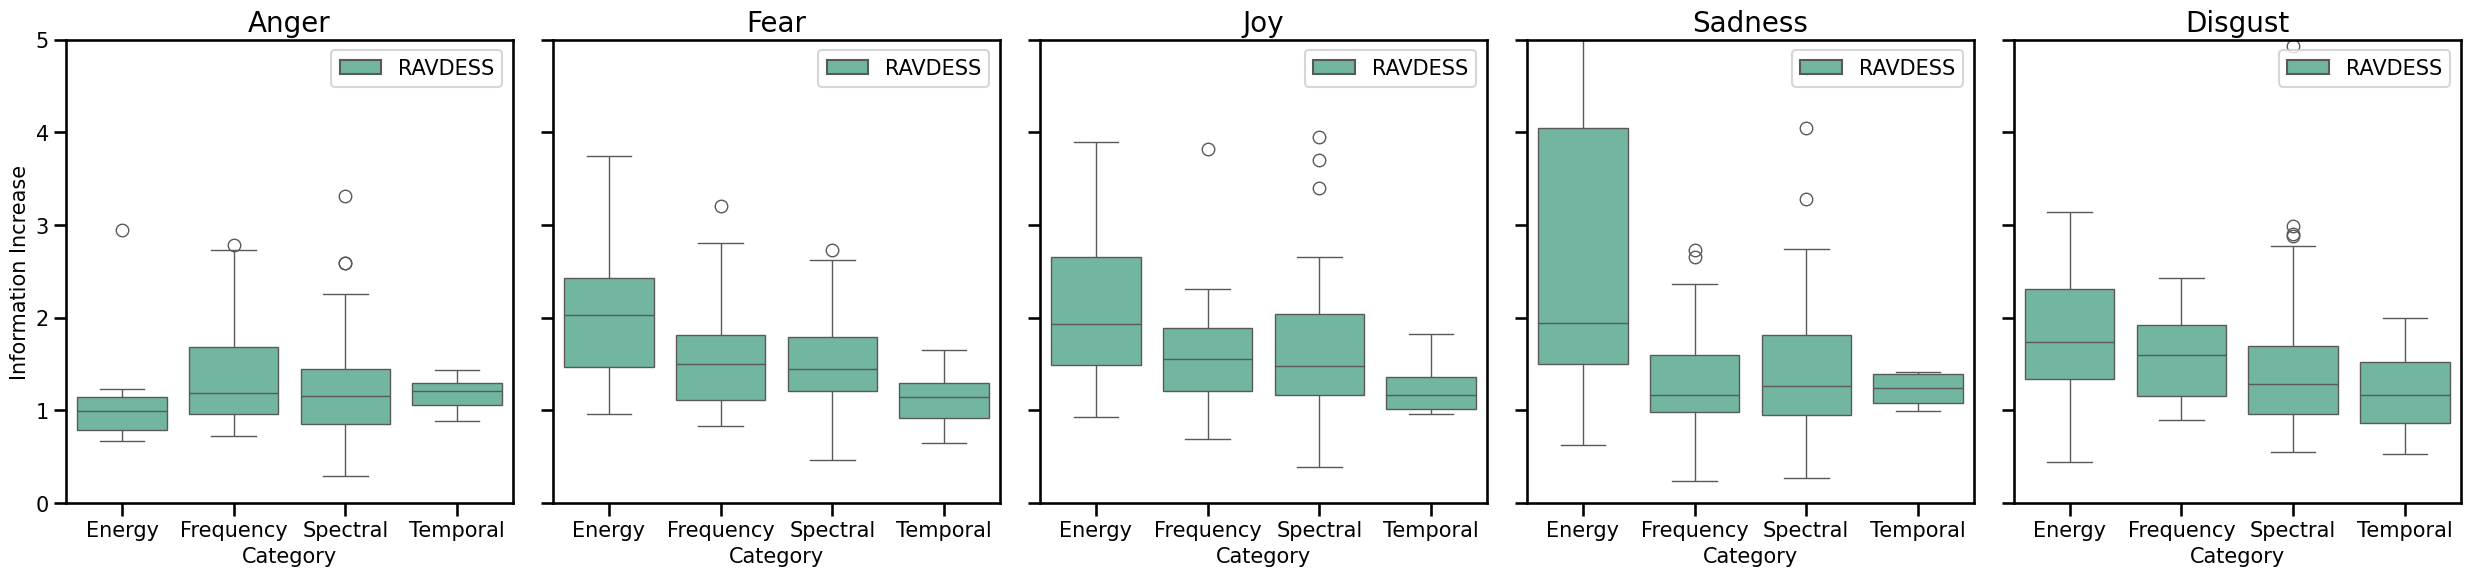

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# File paths for each emotion and dataset
pickle_files = {
    'Anger': {
        'RAVDESS': 'anger_ravdess_infogain.pkl',
    },
    'Fear': {
        'RAVDESS': 'fear_ravdess_infogain.pkl',
    },
    'Joy': {
        'RAVDESS': 'joy_ravdess_infogain.pkl',
    },
    'Sadness': {
        'RAVDESS': 'sadness_ravdess_infogain.pkl',
    },
    'Disgust': {
        'RAVDESS': 'disgust_ravdess_infogain.pkl',
    }
}

# Function to load data from pickle and calculate 'information_increase'
def load_and_calculate_information_increase(file_path, dataset_name):
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
    # df['information_increase'] = df['rmse_all'] / (df['rmse_top'] ** 2)
    df['information_increase'] = 1 / (df['rmse_top_squared_all'])

    df['Dataset'] = dataset_name
    return df

# Load dataframes and calculate information increase
dataframes = []

for emotion, datasets in pickle_files.items():
    print(emotion)
    print(datasets)
    for dataset_name, file_path in datasets.items():
        df = load_and_calculate_information_increase(file_path, dataset_name)
        df['Emotion'] = emotion
        dataframes.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dataframes)

# Define category order
category_order = ['Energy', 'Frequency', 'Spectral', 'Temporal']

# Set the context for larger font sizes
sns.set_context("talk", font_scale=0.8)  # Increase the font scale

# Plotting
plt.figure(figsize=(25, 6))  # Adjust figure size as per requirement

# Create a grid with 5 columns for each emotion
fig, axs = plt.subplots(1, 5, figsize=(25, 6), sharey=True)

# Loop through each emotion and plot its box plot
for i, emotion in enumerate(pickle_files.keys()):
    sns.boxplot(
        data=combined_df[combined_df['Emotion'] == emotion],
        x='category',
        y='information_increase',
        hue='Dataset',  # Differentiating between 'RAVDESS' and 'SAVEE'
        order=category_order,  # Ensure the x-axis follows the specific order
        ax=axs[i],
        palette='Set2'  # Use a color palette
    )
    axs[i].set_title(emotion, fontsize=20)  # Increase title font size
    axs[i].set_xlabel('Category', fontsize=15)  # Increase x-axis label font size
    axs[i].set_ylabel('Information Increase' if i == 0 else '', fontsize=15)  # Show y-label only for first plot
    axs[i].tick_params(axis='x', labelsize=15)  # Increase x-axis tick font size
    axs[i].tick_params(axis='y', labelsize=15)  # Increase y-axis tick font size
    axs[i].set_ylim(0, 5)  # Set the y-axis range from 0 to 5
    axs[i].legend(loc='upper right', fontsize=15)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# SHAP

<Figure size 2500x600 with 0 Axes>

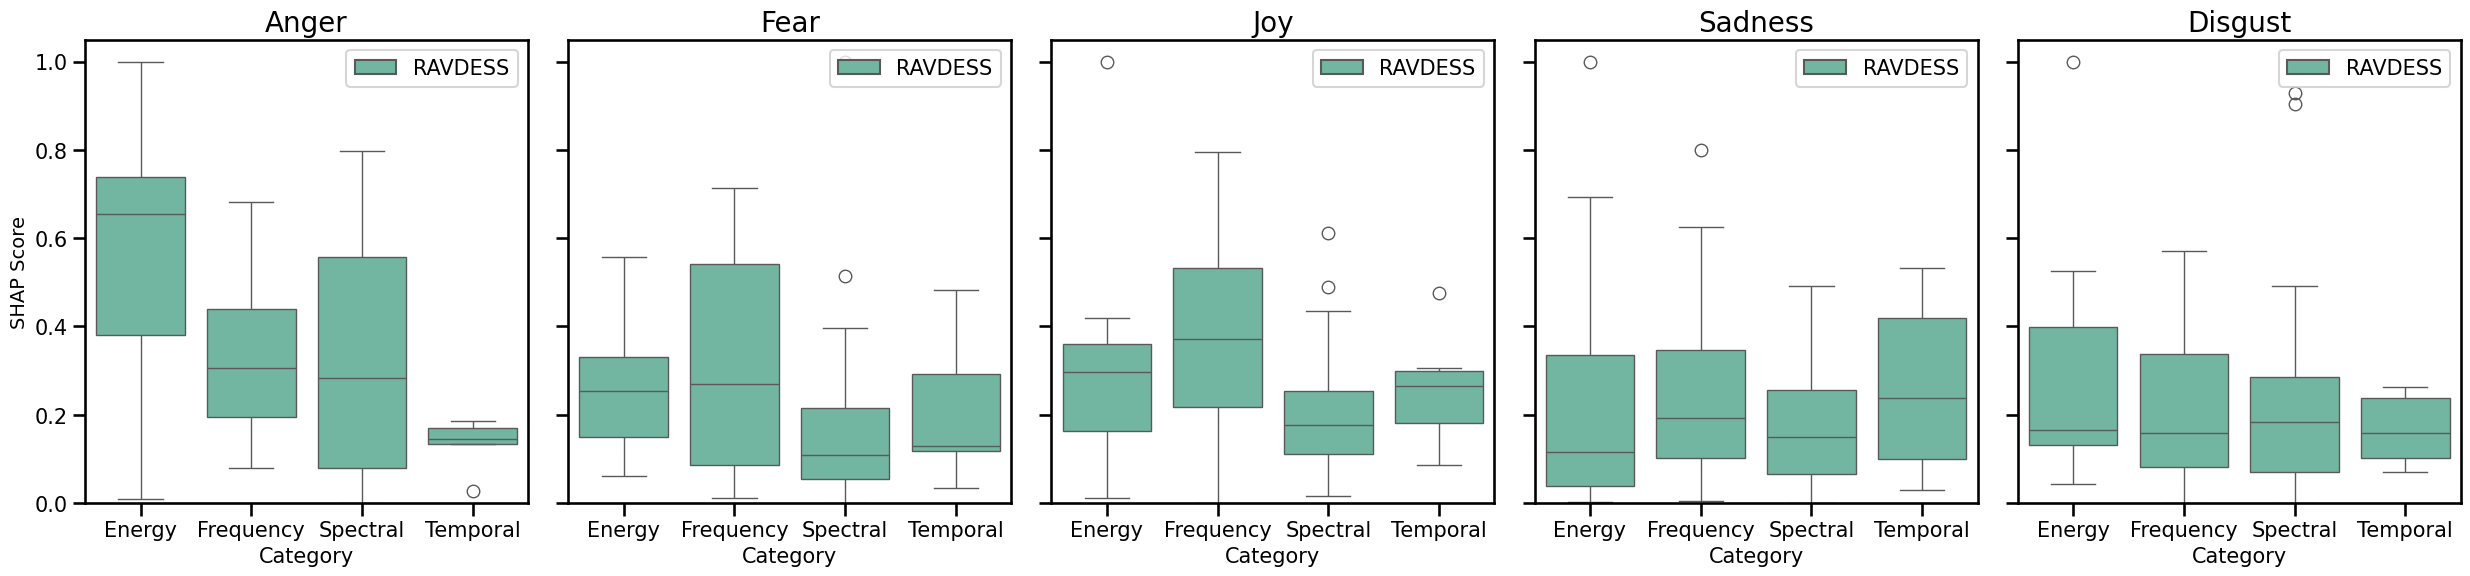

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths for each emotion and dataset with normalized SHAP scores
shap_pickle_files = {
    'Anger': {
        'RAVDESS': 'anger_ravdess_processed.pkl',
    },
    'Fear': {
        'RAVDESS': 'fear_ravdess_processed.pkl',
    },
    'Joy': {
        'RAVDESS': 'joy_ravdess_processed.pkl',
    },
    'Sadness': {
        'RAVDESS': 'sadness_ravdess_processed.pkl',
    },
    'Disgust': {
        'RAVDESS': 'disgust_ravdess_processed.pkl',
    }
}

# Function to load SHAP data from pickle files
def load_shap_data(file_path, dataset_name):
    with open(file_path, 'rb') as f:
        df = pickle.load(f)
    df['Dataset'] = dataset_name  # Add dataset label
    return df

# Load SHAP dataframes for each emotion and dataset
shap_dataframes = []

for emotion, datasets in shap_pickle_files.items():
    for dataset_name, file_path in datasets.items():
        df = load_shap_data(file_path, dataset_name)
        df['Emotion'] = emotion  # Add emotion label
        shap_dataframes.append(df)

# Concatenate all dataframes into one for plotting
combined_shap_df = pd.concat(shap_dataframes)

# Define category order
category_order = ['Energy', 'Frequency', 'Spectral', 'Temporal']

# Set the context for larger font sizes
sns.set_context("talk", font_scale=0.8)  # Increase the font scale

# Plotting SHAP importance box plots
plt.figure(figsize=(25, 6))  # Adjust figure size

# Create a grid with 5 columns for each emotion
fig, axs = plt.subplots(1, 5, figsize=(25, 6), sharey=True)

# Loop through each emotion and plot its SHAP score box plot
for i, emotion in enumerate(shap_pickle_files.keys()):
    sns.boxplot(
        data=combined_shap_df[combined_shap_df['Emotion'] == emotion],
        x='Category',
        y='Importance',
        hue='Dataset',  # Differentiating between 'RAVDESS' and 'SAVEE'
        order=category_order,  # Ensure the x-axis follows the specific order
        ax=axs[i],
        palette='Set2'  # Use a color palette
    )
    axs[i].set_title(emotion, fontsize=20)  # Increase title font size
    axs[i].set_xlabel('Category', fontsize=15)  # Increase x-axis label font size
    axs[i].set_ylabel('SHAP Score' if i == 0 else '', fontsize=14)  # Show y-label only for first plot
    axs[i].tick_params(axis='x', labelsize=15)  # Increase x-axis tick font size
    axs[i].tick_params(axis='y', labelsize=15)  # Increase y-axis tick font size
    axs[i].set_ylim(0, 1.05)  # Set the y-axis range from 0 to 5
    axs[i].legend(loc='upper right', fontsize=15)  # Ensure legend is in the top-right corner with appropriate font size

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
